<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/FinalProject_Classification_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project - Classification
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

## Confusion Matrix Function

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

#Acquire Data -

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

#Statistical and Visual Exploration

In [ ]:
iris.data.features

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.data.targets

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
.value_counts()

,count
petal length,
1.5,14
1.4,12
4.5,8
5.1,8
1.3,7
1.6,7
5.6,6
4.9,5
4.0,5


In [ ]:
species_counts = df['class'].value_counts()

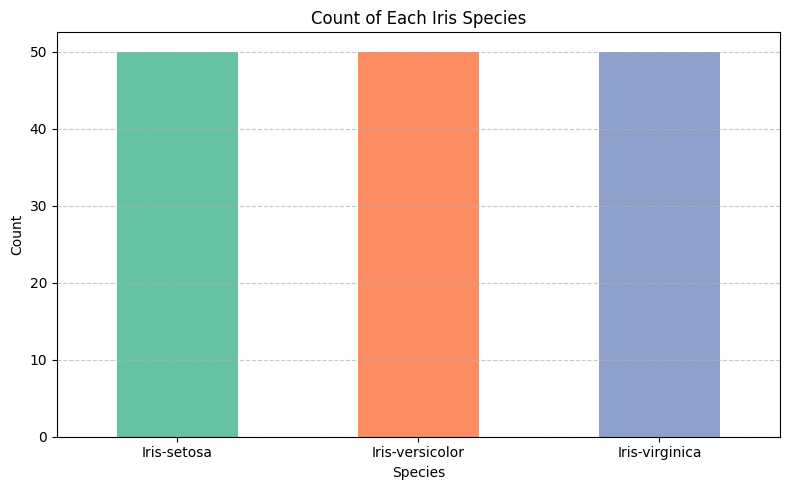

In [ ]:
plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

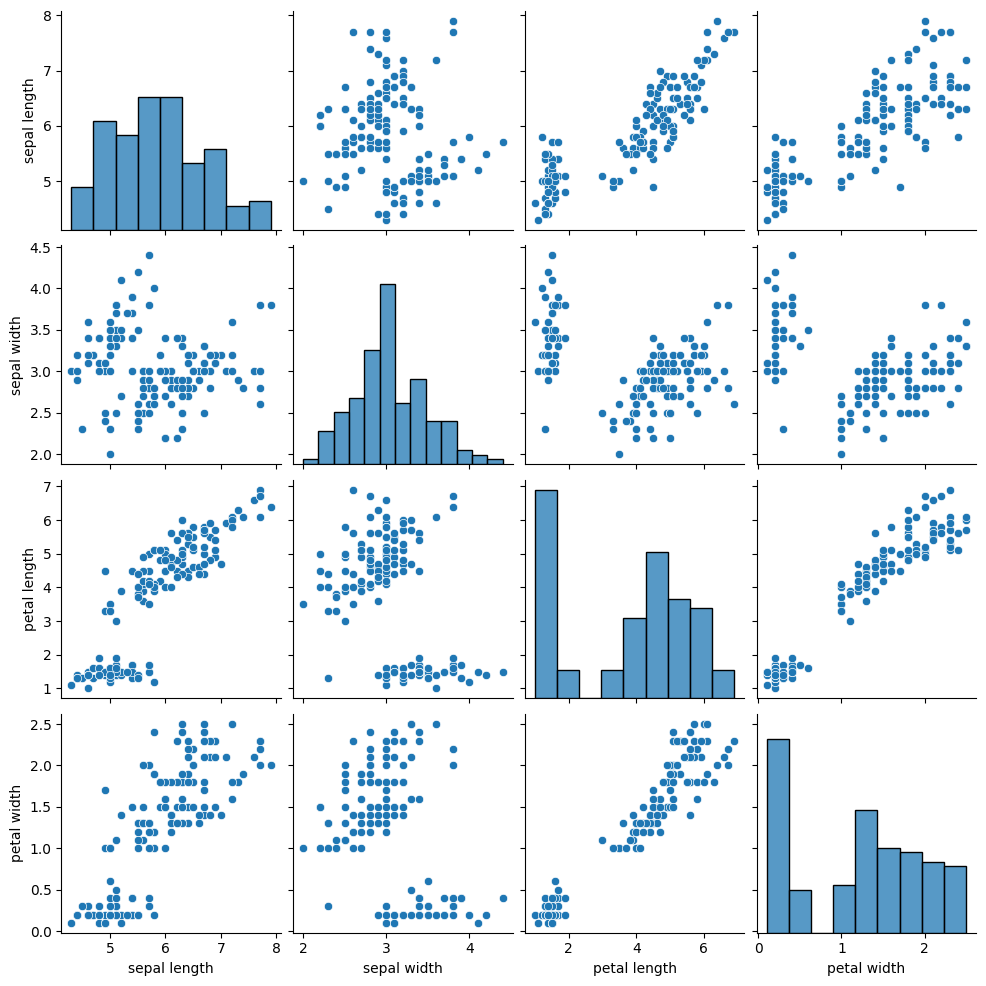

In [ ]:
sns.pairplot(df)
plt.show()

# Splitting Data into Train/Test

In [ ]:
X = iris.data.features
y = iris.data.targets

In [ ]:
X.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
y.head(2)

,class
0,Iris-setosa
1,Iris-setosa


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

#Building the Pipeline

In [47]:
num_attribs = X_train.columns

In [48]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

Logistic regression Pipeline

In [49]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])


Random Forest Pipeline

In [68]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=120, bootstrap=True, n_jobs=-1))
                     ])

#Executing the Model

Logistic Regression Pipeline

In [50]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                ('mlr', LogisticRegression(max_iter=1000))])

GridSearch with logistic regression

In [55]:
param_grid_lr = {
    'mlr__C': [0.1, 1, 10],
    'mlr__penalty': ['l1', 'l2']
}

In [56]:
grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='accuracy')

In [57]:
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                                       ('mlr',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'mlr__C': [0.1, 1, 10], 'mlr__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [58]:
print("Logistic Regression:")
print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

Logistic Regression:
Best Hyperparameters: {'mlr__C': 10, 'mlr__penalty': 'l2'}
Best Score: 0.95


Random Forest Pipeline

In [69]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=120, n_estimators=1000,
                                        n_jobs=-1))])

#Evaluating the Model

Logistic Regression Predictions

In [59]:
y_pred = pipeline.predict(X_test)

In [63]:
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



GridSearch Predictions

In [72]:
y_pred_grid = grid_search_lr.predict(X_test)

In [73]:
print(classification_report(y_pred_grid, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Random Forest Predictions

In [70]:
y_pred_rf = random_forest.predict(X_test)

In [71]:
print(classification_report(y_pred_rf, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



#Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.